In [1]:
import pandas as pd

In [2]:
ref, quantities, prix_vente = [['D','F','B','A','C','E','G'],
       [315,192,198,225,518,420,600],
       [1640,1240,500,280,36,18,12]
       ]

In [3]:
mydict = {"ref":['D','F','B','A','C','E','G'],
       "quantities":[315,192,198,225,518,420,600],
       "prix_vente":[1640,1240,500,280,36,18,12]
}

In [4]:
def csvDf(dat,**kwargs): 
  from numpy import array
  data = array(dat)
  if data is None or len(data)==0 or len(data[0])==0:
    return None
  else:
    return pd.DataFrame(data[1:,1:],index=data[1:,0],columns=data[0,1:],**kwargs)

In [5]:
csvDf([ref,quantities,prix_vente])

,F,B,A,C,E,G
315,192,198,225,518,420,600
1640,1240,500,280,36,18,12


In [6]:
import pandas as pd

data = pd.DataFrame([quantities,prix_vente],index=['Q','PV'],columns=ref)
data.T

,Q,PV
D,315,1640
F,192,1240
B,198,500
A,225,280
C,518,36
E,420,18
G,600,12


In [7]:
df = pd.DataFrame(mydict)
df

,ref,quantities,prix_vente
0,D,315,1640
1,F,192,1240
2,B,198,500
3,A,225,280
4,C,518,36
5,E,420,18
6,G,600,12


In [8]:
df['CA']=df['prix_vente']*df['quantities']
df['%CA']=df['CA']/df['CA'].sum()*100
df['%CAcumul']=df['%CA'].cumsum()

df['%Q']=df['quantities']/df['quantities'].sum()*100
df['%Qcumul']=df['%Q'].cumsum()
df

,ref,quantities,prix_vente,CA,%CA,%CAcumul,%Q,%Qcumul
0,D,315,1640,516600,54.373911,54.373911,12.763371,12.763371
1,F,192,1240,238080,25.058731,79.432642,7.779579,20.542950
2,B,198,500,99000,10.420087,89.852729,8.022690,28.565640
3,A,225,280,63000,6.630965,96.483694,9.116694,37.682334
4,C,518,36,18648,1.962766,98.446460,20.988655,58.670989
5,E,420,18,7560,0.795716,99.242175,17.017828,75.688817
6,G,600,12,7200,0.757825,100.000000,24.311183,100.000000


<Axes: xlabel='ref'>

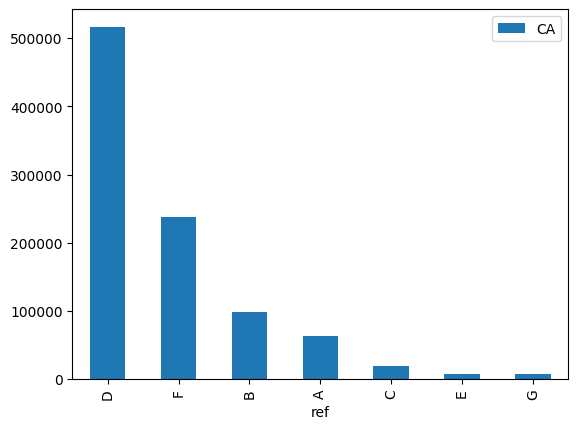

In [9]:
df.plot.bar(x='ref',y='CA')

<Axes: xlabel='ref'>

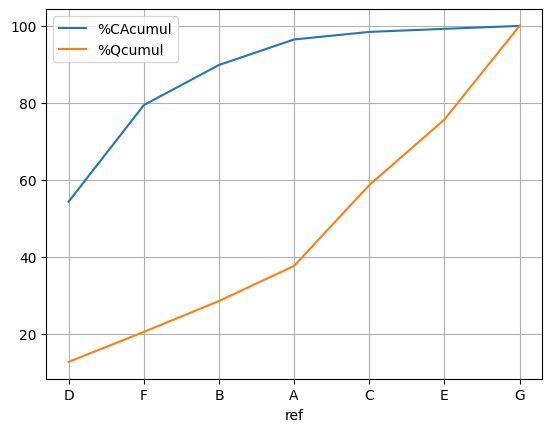

In [10]:
df.plot(x='ref',y=['%CAcumul','%Qcumul'],grid=True)

Les produits D et F produisent 80% du chiffre d'affaires avec seulement 20% de quantité.

Les autres produits ne font que les 20% restant.
